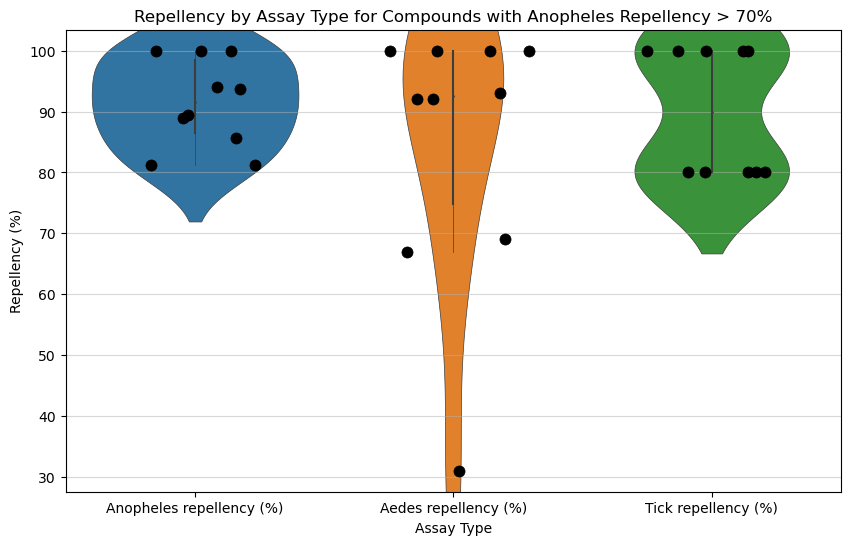

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = 'species_data_20241022.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Extract relevant columns and identify compounds with Anopheles repellency > 70
compound_data = data[['Compound', 'Anopheles repellency (%)', 'Aedes repellency (%)', 
                      'Tick repellency (%)']]
high_anopheles_compounds = compound_data[compound_data['Anopheles repellency (%)'] > 70]['Compound']

# Filter the data to include all rows for compounds meeting the Anopheles > 70 criteria
filtered_compound_data = compound_data[compound_data['Compound'].isin(high_anopheles_compounds)]

# Melt the data for a long-form format suitable for a strip plot
melted_data = filtered_compound_data.melt(id_vars='Compound', var_name='Assay', value_name='Repellency')

# Remove rows with NaN values in the 'Repellency' column for clearer plotting
filtered_data = melted_data.dropna(subset=['Repellency'])

# Plot the strip plot with adjusted settings
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, x='Assay', y='Repellency', jitter=0.3, dodge=True, size=8, 
              edgecolor='gray', linewidth=0.5)
sns.stripplot(data=filtered_data, x='Assay', y='Repellency', jitter=0.3, dodge=True, size=8, 
              edgecolor='gray', linewidth=0.5, color='black')
plt.title('Repellency by Assay Type for Compounds with Anopheles Repellency > 70%')
plt.xlabel('Assay Type')
plt.ylabel('Repellency (%)')
plt.grid(axis='y', alpha=0.5)
plt.show()